In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('modelling1.csv')

In [4]:
df1.columns

Index(['site_no', 'year', 'material_id', 'specimen_status', 'city', 'state',
       'internal_drainage', 'resistivity', 'pH', 'mean_temp',
       'annual_precipitation', 'moisture', 'areation', 'approximate_days',
       'weight_loss_g', 'corrosion_rate', 'C_clr', 'Si_clr', 'Mn_clr', 'S_clr',
       'P_clr', 'Cr_clr', 'Ni_clr', 'Cu_clr', 'Mo_clr', 'log_days',
       'moisture_res_index', 'log_resistivity', 'log_corrosion_rate',
       'texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'iron_type_Wrought', 'climate_zone_Temperate', 'internal_drainage_code',
       'areation_code'],
      dtype='object')

In [9]:
df = df1[['log_corrosion_rate','texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation', 'log_resistivity',
       'mean_temp', 'C_clr', 'Si_clr', 'Mn_clr', 'S_clr',
       'Cr_clr', 'Ni_clr', 'Cu_clr', 'Mo_clr', 'log_days',
        #'P_clr',
         ]].copy()

In [86]:
df = df1[['log_corrosion_rate', 'texture_Clay',
       'texture_Clay Loam', 'texture_Loam', 'texture_Loamy Sand',
       'texture_Marsh', 'texture_Muck', 'texture_Peat', 'texture_Sand',
       'texture_Sandy Clay Loam', 'texture_Sandy Loam', 'texture_Silt Loam',
       'texture_Silty Clay', 'texture_Silty Clay Loam', 
       'internal_drainage_code',
       'pH', 
       'annual_precipitation', 
       'log_resistivity', 
       'mean_temp', 
       'material_id_3', 'material_id_4', 'material_id_7', 'material_id_8',
       'material_id_12', 'material_id_13', 'material_id_14', 'material_id_15',
       'material_id_16', 'material_id_17', 'material_id_18', 'material_id_19',
       'material_id_24', 'material_id_25', 'material_id_26', 'material_id_29',
       'material_id_30', 'material_id_31', 'material_id_32', 'material_id_33',
       'material_id_34', 'material_id_35', 'material_id_36', 'material_id_37',
       'material_id_38', 'material_id_41', 'material_id_42', 'material_id_43',
       'material_id_44', 'material_id_45', 'material_id_46', 'material_id_47',
       'material_id_60', 'material_id_62', 'material_id_63', 'material_id_64',
       'material_id_65', 'material_id_67', 'material_id_68', 'material_id_70',
       'material_id_72', 'material_id_73', 'material_id_74', 'material_id_75',
       'material_id_76', 'material_id_77', 'material_id_78', 'material_id_79',
       'material_id_80', 
       'log_days'
         ]].copy()

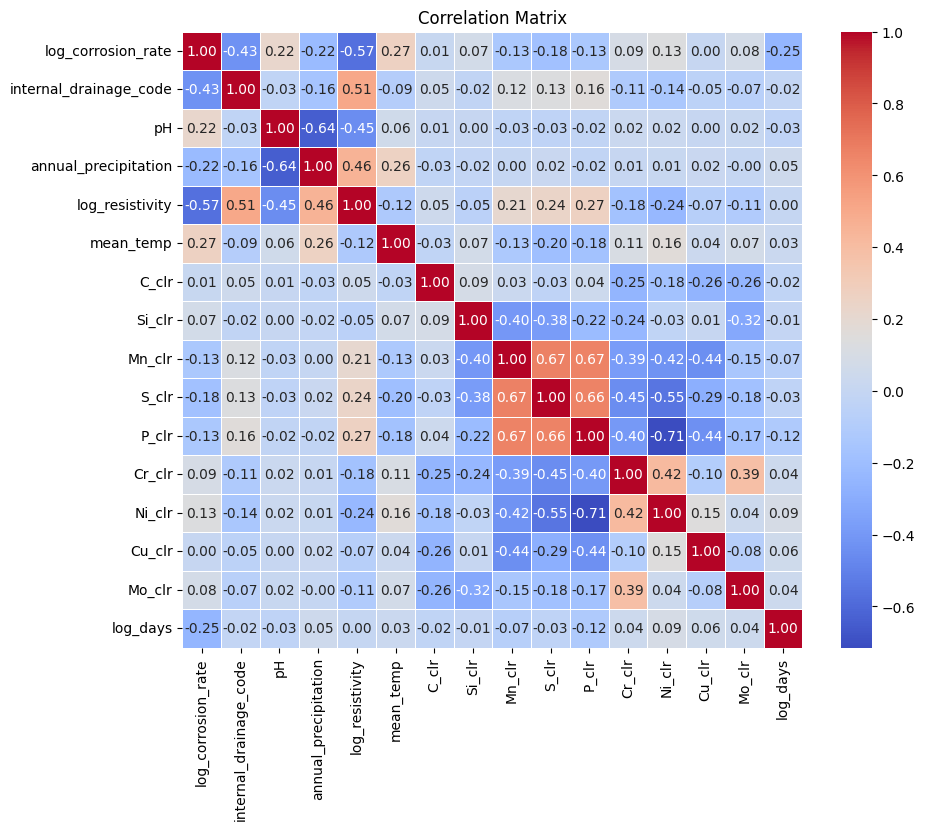

In [8]:
corr_matrix = df.corr(numeric_only=True)  
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
corr_matrix = df.corr(numeric_only=True)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

high_corr = upper.stack().reset_index()
high_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']
high_corr_filtered = high_corr[high_corr['Correlation'].abs() > 0.7]


print(high_corr_filtered.sort_values(by='Correlation', ascending=False))

Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


In [11]:
df.head()

,log_corrosion_rate,texture_Clay,texture_Clay Loam,texture_Loam,texture_Loamy Sand,texture_Marsh,texture_Muck,texture_Peat,texture_Sand,texture_Sandy Clay Loam,...,mean_temp,C_clr,Si_clr,Mn_clr,S_clr,Cr_clr,Ni_clr,Cu_clr,Mo_clr,log_days
0,0.002497,1,0,0,0,0,0,0,0,0,...,49.2,5.219872,6.82931,3.428114,4.954169,-10.680427,-10.680427,4.814407,-10.680427,5.900582
1,-0.074400,1,0,0,0,0,0,0,0,0,...,49.2,5.219872,6.82931,3.428114,4.954169,-10.680427,-10.680427,4.814407,-10.680427,7.181516
2,-0.179725,1,0,0,0,0,0,0,0,0,...,49.2,5.219872,6.82931,3.428114,4.954169,-10.680427,-10.680427,4.814407,-10.680427,7.605333
3,-0.304082,1,0,0,0,0,0,0,0,0,...,49.2,5.219872,6.82931,3.428114,4.954169,-10.680427,-10.680427,4.814407,-10.680427,7.941804
4,-0.200771,1,0,0,0,0,0,0,0,0,...,49.2,5.219872,6.82931,3.428114,4.954169,-10.680427,-10.680427,4.814407,-10.680427,8.162345


In [12]:
X = df.drop(columns="log_corrosion_rate")
y = df["log_corrosion_rate"]


In [13]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)  # 0.1765*0.85 ≈ 0.15


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [15]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
y_val_pred = lr.predict(X_val_scaled)
y_test_pred = lr.predict(X_test_scaled)

In [17]:
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))

In [18]:
rmse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

### **Iteration 1**


In [29]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam'],
      dtype='object')
Validation R²: 0.1505
Validation RMSE: 0.8482
Test R²: 0.1662
Test RMSE: 0.8087
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.6720
  texture_Clay Loam: -0.4591
  texture_Loam: -0.0869
  texture_Loamy Sand: -0.3636
  texture_Marsh: -0.3138
  texture_Muck: -0.3435
  texture_Peat: -0.2225
  texture_Sand: -0.2943
  texture_Sandy Clay Loam: -0.2281
  texture_Sandy Loam: -0.6717
  texture_Silt Loam: -0.5782
  texture_Silty Clay: -0.4701
  texture_Silty Clay Loam: -0.6038


### **Iteration 2**


In [40]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code'],
      dtype='object')
Validation R²: 0.2914
Validation RMSE: 0.7747
Test R²: 0.2996
Test RMSE: 0.6793
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.3542
  texture_Clay Loam: -0.0828
  texture_Loam: -0.0287
  texture_Loamy Sand: -0.1822
  texture_Marsh: -0.3138
  texture_Muck: -0.3435
  texture_Peat: -0.1480
  texture_Sand: -0.1158
  texture_Sandy Clay Loam: -0.0890
  texture_Sandy Loam: -0.2464
  texture_Silt Loam: -0.1827
  texture_Silty Clay: -0.2836
  texture_Silty Clay Loam: -0.1403
  internal_drainage_code: -0.5774


### **Iteration 3**


In [49]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH'],
      dtype='object')
Validation R²: 0.3144
Validation RMSE: 0.7620
Test R²: 0.3246
Test RMSE: 0.6551
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.3392
  texture_Clay Loam: -0.1027
  texture_Loam: -0.0373
  texture_Loamy Sand: -0.1721
  texture_Marsh: -0.2667
  texture_Muck: -0.2636
  texture_Peat: -0.0704
  texture_Sand: -0.0835
  texture_Sandy Clay Loam: -0.0882
  texture_Sandy Loam: -0.2807
  texture_Silt Loam: -0.2272
  texture_Silty Clay: -0.2908
  texture_Silty Clay Loam: -0.1589
  internal_drainage_code: -0.4782
  pH: 0.1895


### **Iteration 4**


In [58]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation'],
      dtype='object')
Validation R²: 0.3633
Validation RMSE: 0.7343
Test R²: 0.3740
Test RMSE: 0.6071
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.2811
  texture_Clay Loam: -0.0936
  texture_Loam: -0.0544
  texture_Loamy Sand: -0.1668
  texture_Marsh: -0.2677
  texture_Muck: -0.2805
  texture_Peat: -0.1454
  texture_Sand: -0.0966
  texture_Sandy Clay Loam: -0.0619
  texture_Sandy Loam: -0.2881
  texture_Silt Loam: -0.1913
  texture_Silty Clay: -0.2858
  texture_Silty Clay Loam: -0.1533
  internal_drainage_code: -0.5504
  pH: -0.0233
  annual_precipitation: -0.2717


### **Iteration 5**


In [67]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation',
       'log_resistivity'],
      dtype='object')
Validation R²: 0.4514
Validation RMSE: 0.6817
Test R²: 0.5034
Test RMSE: 0.4816
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.4004
  texture_Clay Loam: -0.1029
  texture_Loam: -0.0577
  texture_Loamy Sand: -0.2118
  texture_Marsh: -0.4913
  texture_Muck: -0.3403
  texture_Peat: -0.3072
  texture_Sand: -0.0867
  texture_Sandy Clay Loam: -0.0593
  texture_Sandy Loam: -0.2890
  texture_Silt Loam: -0.2569
  texture_Silty Clay: -0.3118
  texture_Silty Clay Loam: -0.3249
  internal_drainage_code: -0.2815
  pH: -0.2009
  annual_precipitation: -0.0188
  log_resistivity: -0.6311


### **Iteration 6**


In [76]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation',
       'log_resistivity', 'mean_temp'],
      dtype='object')
Validation R²: 0.5227
Validation RMSE: 0.6358
Test R²: 0.5607
Test RMSE: 0.4261
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.6379
  texture_Clay Loam: -0.3082
  texture_Loam: -0.1083
  texture_Loamy Sand: -0.2620
  texture_Marsh: -0.5267
  texture_Muck: -0.4814
  texture_Peat: -0.3129
  texture_Sand: -0.2824
  texture_Sandy Clay Loam: -0.1427
  texture_Sandy Loam: -0.5137
  texture_Silt Loam: -0.3636
  texture_Silty Clay: -0.4165
  texture_Silty Clay Loam: -0.4322
  internal_drainage_code: -0.3840
  pH: -0.2657
  annual_precipitation: -0.2820
  log_resistivity: -0.3587
  mea

### **Iteration 7**


In [85]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation',
       'log_resistivity', 'mean_temp', 'material_id_3', 'material_id_4',
       'material_id_7', 'material_id_8', 'material_id_12', 'material_id_13',
       'material_id_14', 'material_id_15', 'material_id_16', 'material_id_17',
       'material_id_18', 'material_id_19', 'material_id_24', 'material_id_25',
       'material_id_26', 'material_id_29', 'material_id_30', 'material_id_31',
       'material_id_32', 'material_id_33', 'material_id_34', 'material_id_35',
       'material_id_36', 'material_id_37', 'material_id_38', 'material_id_41',
       'material_id_42', 'material_id_43', 'material_id_44', 'material_id_45',
       'material_id_46', '

### **Iteration 8**


In [95]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation',
       'log_resistivity', 'mean_temp', 'material_id_3', 'material_id_4',
       'material_id_7', 'material_id_8', 'material_id_12', 'material_id_13',
       'material_id_14', 'material_id_15', 'material_id_16', 'material_id_17',
       'material_id_18', 'material_id_19', 'material_id_24', 'material_id_25',
       'material_id_26', 'material_id_29', 'material_id_30', 'material_id_31',
       'material_id_32', 'material_id_33', 'material_id_34', 'material_id_35',
       'material_id_36', 'material_id_37', 'material_id_38', 'material_id_41',
       'material_id_42', 'material_id_43', 'material_id_44', 'material_id_45',
       'material_id_46', '

### **Without Materials**


In [19]:
print(X.columns)
print(f"Validation R²: {r2_val:.4f}")
print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test R²: {r2_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print("Coefficients:")
for feature, coef in zip(X.columns, lr.coef_):
    print(f"  {feature}: {coef:.4f}")

Index(['texture_Clay', 'texture_Clay Loam', 'texture_Loam',
       'texture_Loamy Sand', 'texture_Marsh', 'texture_Muck', 'texture_Peat',
       'texture_Sand', 'texture_Sandy Clay Loam', 'texture_Sandy Loam',
       'texture_Silt Loam', 'texture_Silty Clay', 'texture_Silty Clay Loam',
       'internal_drainage_code', 'pH', 'annual_precipitation',
       'log_resistivity', 'mean_temp', 'C_clr', 'Si_clr', 'Mn_clr', 'S_clr',
       'Cr_clr', 'Ni_clr', 'Cu_clr', 'Mo_clr', 'log_days'],
      dtype='object')
Validation R²: 0.5876
Validation RMSE: 0.5910
Test R²: 0.6250
Test RMSE: 0.3637
Intercept: -0.4815
Coefficients:
  texture_Clay: -0.6896
  texture_Clay Loam: -0.3380
  texture_Loam: -0.1246
  texture_Loamy Sand: -0.2897
  texture_Marsh: -0.5375
  texture_Muck: -0.4725
  texture_Peat: -0.3126
  texture_Sand: -0.3071
  texture_Sandy Clay Loam: -0.1738
  texture_Sandy Loam: -0.5661
  texture_Silt Loam: -0.4084
  texture_Silty Clay: -0.4565
  texture_Silty Clay Loam: -0.4858
  internal_drai

### **Predictions**


In [ ]:
val_results = X_val.copy()
val_results['Actual'] = np.exp(y_val.values)
val_results['Predicted'] = np.exp(y_val_pred)

In [96]:
test_results = X_test.copy()
test_results['Actual'] = np.exp(y_test)
test_results['Predicted'] = np.exp(y_test_pred)

In [97]:
test_results.head()

,texture_Clay,texture_Clay Loam,texture_Loam,texture_Loamy Sand,texture_Marsh,texture_Muck,texture_Peat,texture_Sand,texture_Sandy Clay Loam,texture_Sandy Loam,...,material_id_74,material_id_75,material_id_76,material_id_77,material_id_78,material_id_79,material_id_80,log_days,Actual,Predicted
5146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,8.130598,0.2336,0.368786
4696,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.593729,0.2089,1.275107
4740,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,6.593729,0.4595,0.426938
2727,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,8.307528,1.4150,1.034339
1954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.172707,0.2584,0.357033


In [98]:
test_results.to_csv('test_results.csv', index=False)

In [99]:
from joblib import dump
dump(scaler, 'scaler.joblib')
dump(lr, 'model.joblib')

['model.joblib']

In [ ]:
import numpy as np
import pandas as pd
import math

# Example: This should be your original trained scaler and model
# Make sure to define or load them before running this
# from joblib import load
# scaler = load("scaler.joblib")
# lr = load("model.joblib")

# ---------- Feature Setup ----------
texture_types = [
    'Clay', 'Clay_Loam', 'Loam', 'Loamy_Sand', 'Marsh', 'Muck', 'Peat', 'Sand',
    'Sandy_Clay_Loam', 'Sandy_Loam', 'Silt_Loam', 'Silty_Clay', 'Silty_Clay_Loam'
]

material_ids = [3, 4, 7, 8, 12, 13, 14, 15, 16, 17, 18, 19, 24, 25, 26,
                29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 
                45, 46, 47, 60, 62, 63, 64, 65, 67, 68, 70, 72, 73, 74, 
                75, 76, 77, 78, 79, 80]

# ---------- User Inputs ----------
selected_texture = input(f"Choose one texture from {texture_types}: ").strip()
selected_material = int(input(f"Choose one material ID from {material_ids}: "))

internal_drainage_code = float(input("Enter internal drainage code: "))
pH = float(input("Enter pH: "))
annual_precipitation = float(input("Enter annual precipitation: "))
resistivity = float(input("Enter resistivity: "))  # will be logged
mean_temp = float(input("Enter mean temperature: "))
days = float(input("Enter days: "))  # will be logged

# ---------- Create Feature Vector ----------
input_dict = {}

# Initialize all texture dummies to 0
for tex in texture_types:
    input_dict[f"texture_{tex}"] = 1.0 if tex == selected_texture else 0.0

# Initialize all material dummies to 0
for mat in material_ids:
    input_dict[f"material_id_{mat}"] = 1.0 if mat == selected_material else 0.0

# Raw features (to be transformed below)
input_dict["internal_drainage_code"] = internal_drainage_code
input_dict["pH"] = pH
input_dict["annual_precipitation"] = annual_precipitation
input_dict["log_resistivity"] = math.log(resistivity + 1e-8)
input_dict["mean_temp"] = mean_temp
input_dict["log_days"] = math.log(days + 1e-8)

# ---------- Convert to DataFrame ----------
input_df = pd.DataFrame([input_dict])

# ---------- Apply StandardScaler ----------
input_scaled = scaler.transform(input_df)

# ---------- Predict with Trained Model ----------
log_corrosion_pred = lr.predict(input_scaled)[0]
corrosion_rate = np.exp(log_corrosion_pred)

print(f"\nPredicted log(corrosion rate): {log_corrosion_pred:.4f}")
print(f"Predicted corrosion rate: {corrosion_rate:.4f}")
